In [1]:
suppressPackageStartupMessages(library("BasketballAnalyzeR"))
library("BasketballAnalyzeR")
data(package="BasketballAnalyzeR")
PbP <- PbPmanipulation(PbP.BDB)

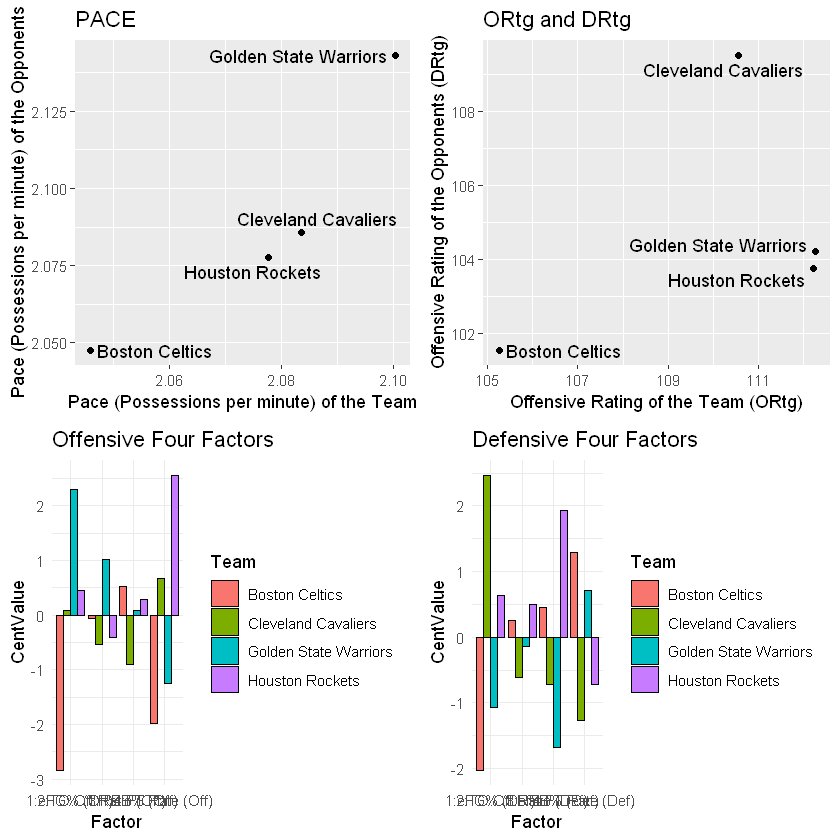

In [2]:
rm(list=ls())

tm <- c("BOS","CLE","GSW","HOU")
selTeams <- which(Tadd$team %in% tm)
FF.sel <- fourfactors(Tbox[selTeams,], Obox[selTeams,])

plot(FF.sel)

Warning message:
"ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


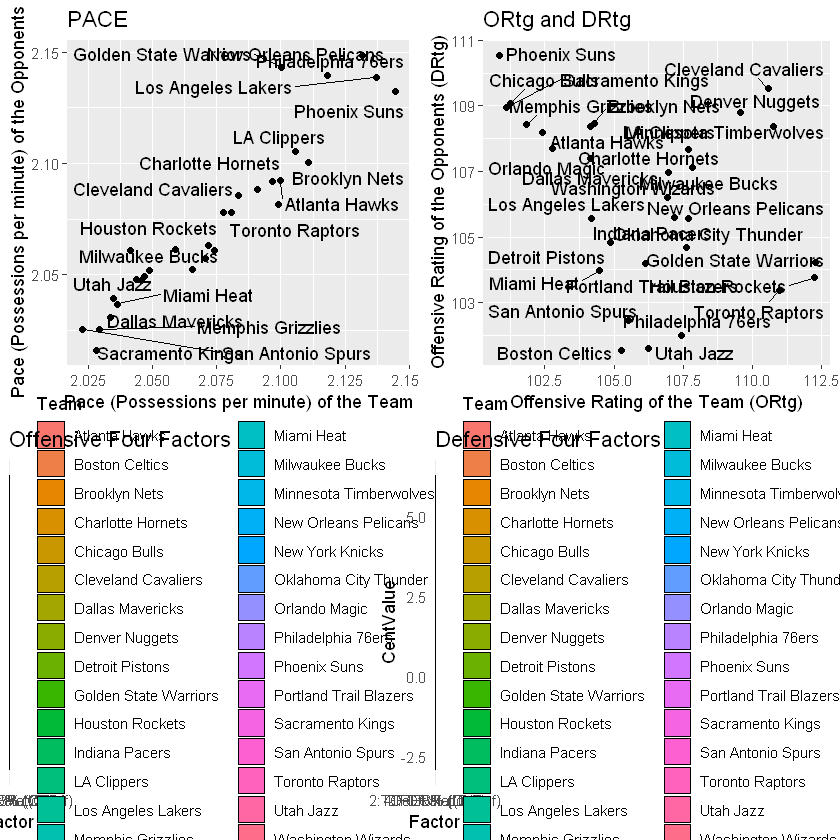

In [3]:
FF <- fourfactors(Tbox,Obox)
listPlots <- plot(FF)

Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


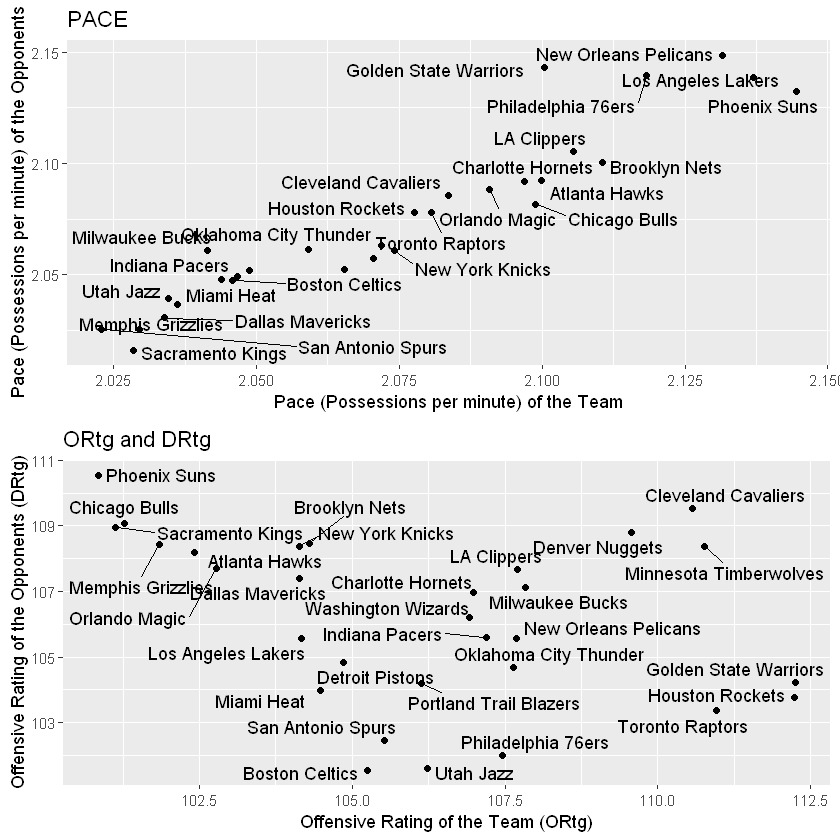

In [4]:
library(gridExtra)
grid.arrange(grobs=listPlots[1:2], ncol=1)

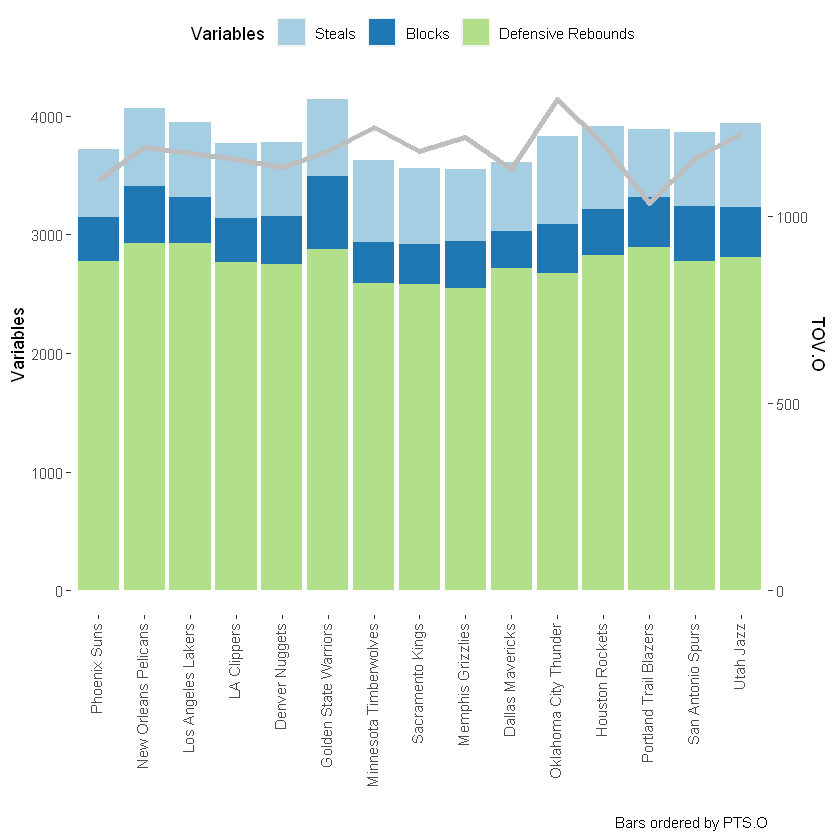

In [5]:
rm(list=ls())

X <- data.frame(Tbox, PTS.O=Obox$PTS, TOV.O=Obox$TOV,
                CONF=Tadd$Conference)
XW <- subset(X, CONF=="W")
labs <- c("Steals","Blocks","Defensive Rebounds")
barline(data=XW, id="Team", bars=c("STL","BLK","DREB"),
        line="TOV.O", order.by="PTS.O", labels.bars=labs)

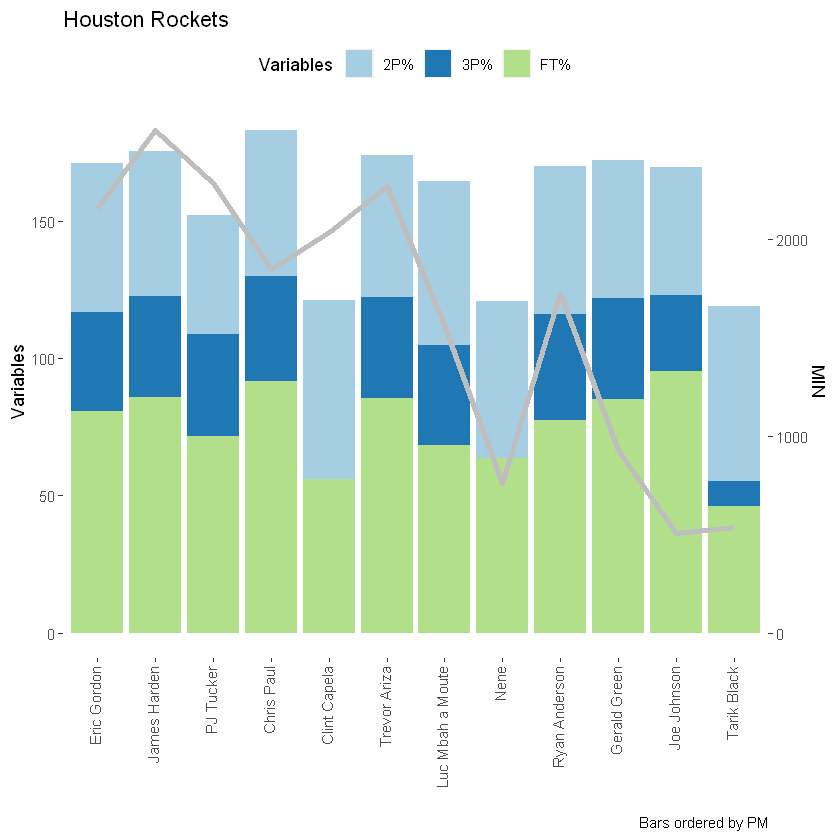

In [6]:
Pbox.HR <- subset(Pbox, Team=="Houston Rockets" &
                  MIN>=500)
barline(data=Pbox.HR, id="Player",
        bars=c("P2p","P3p","FTp"), line="MIN",
        order.by="PM", labels.bars=c("2P%","3P%","FT%"),
        title="Houston Rockets")

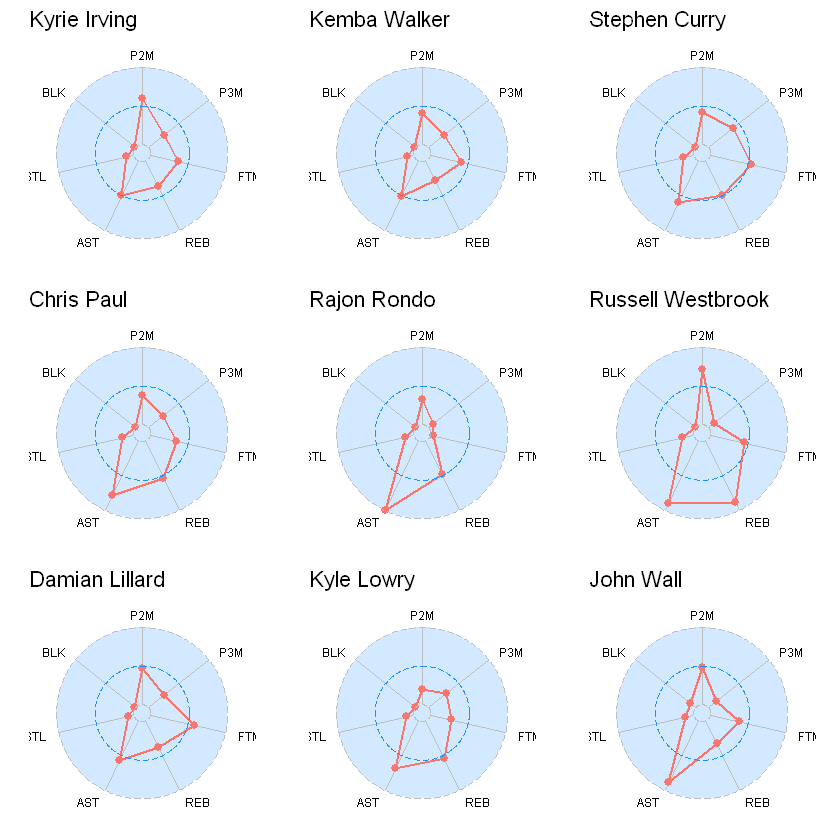

In [7]:
rm(list=ls())

Pbox.PG <- subset(Pbox, Player=="Russell Westbrook" |
                  Player=="Stephen Curry" |
                  Player=="Chris Paul" |
                  Player=="Kyrie Irving" |
                  Player=="Damian Lillard" |
                  Player=="Kyle Lowry" |
                  Player=="John Wall" |
                  Player=="Rajon Rondo" |
                  Player=="Kemba Walker")
attach(Pbox.PG)
X <- data.frame(P2M, P3M, FTM, REB=OREB+DREB, AST,
                STL, BLK)/MIN
detach(Pbox.PG)
radialprofile(data=X, title=Pbox.PG$Player, std=FALSE)

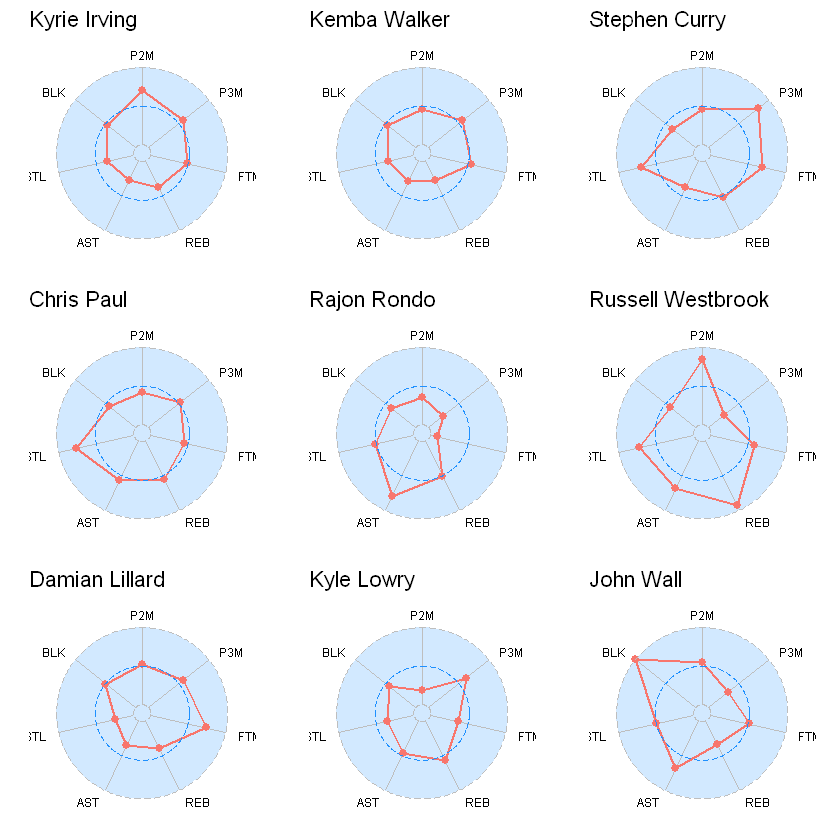

In [8]:
radialprofile(data=X, title=Pbox.PG$Player, std=TRUE)

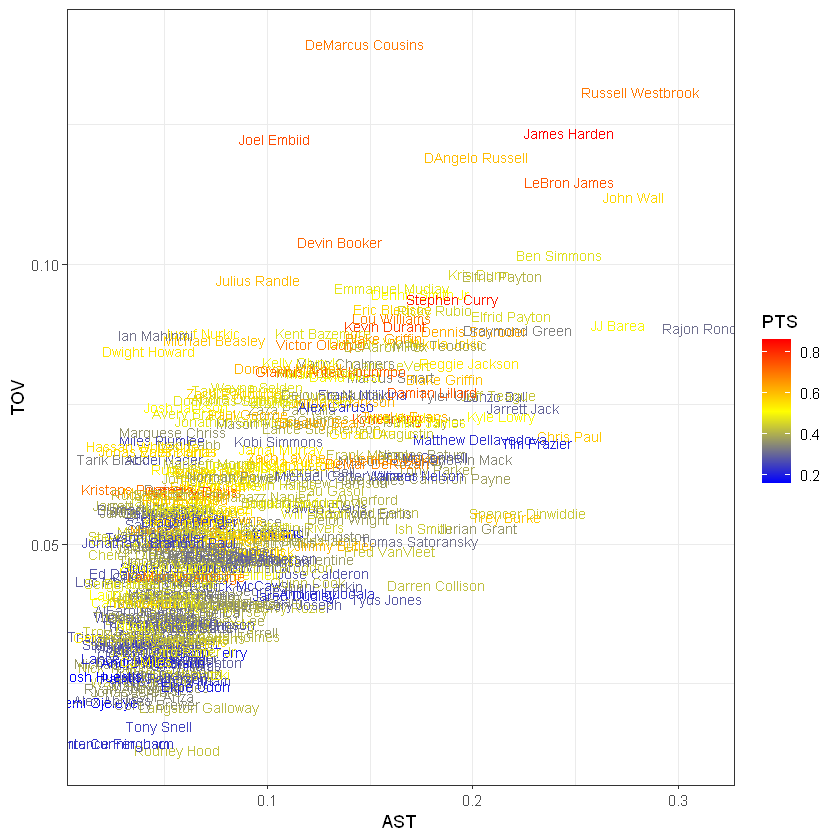

In [9]:
rm(list=ls())

Pbox.sel <- subset(Pbox, MIN>= 500)
attach(Pbox.sel)
X <- data.frame(AST, TOV, PTS)/MIN
detach(Pbox.sel)
mypal <- colorRampPalette(c("blue","yellow","red"))
scatterplot(X, data.var=c("AST","TOV"), z.var="PTS",
            labels=Pbox.sel$Player, palette=mypal)

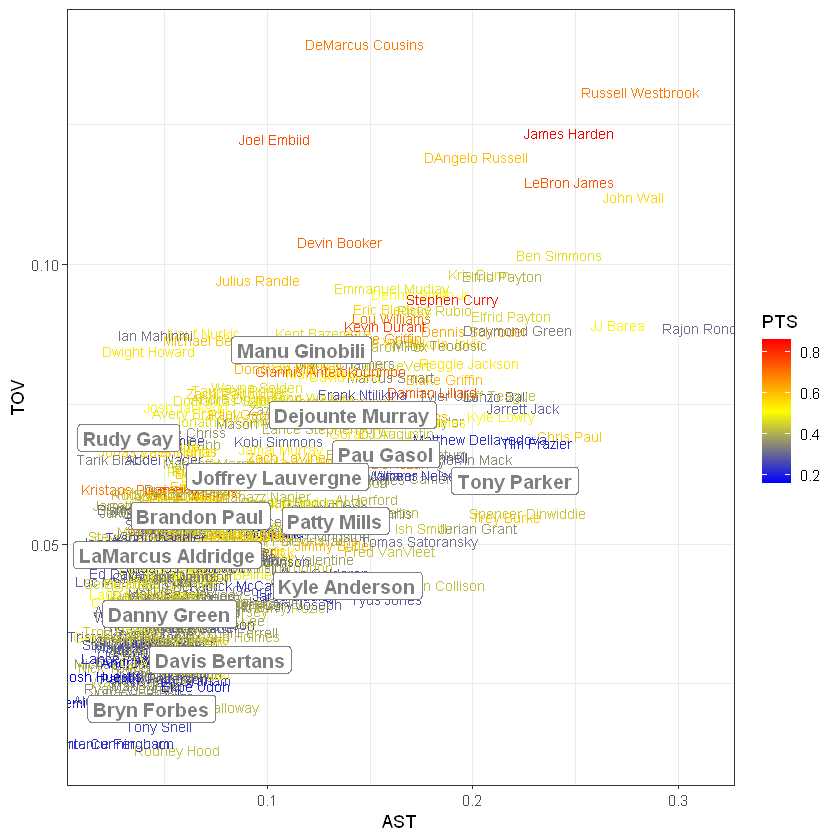

In [10]:
SAS <- which(Pbox.sel$Team=="San Antonio Spurs")
scatterplot(X, data.var=c("AST","TOV"), z.var="PTS",
            labels=Pbox.sel$Player, palette=mypal,
            subset=SAS)

Warning message:
"Removed 169 rows containing missing values (`geom_text()`)."
Warning message:
"Removed 5 rows containing missing values (`geom_label_repel()`)."


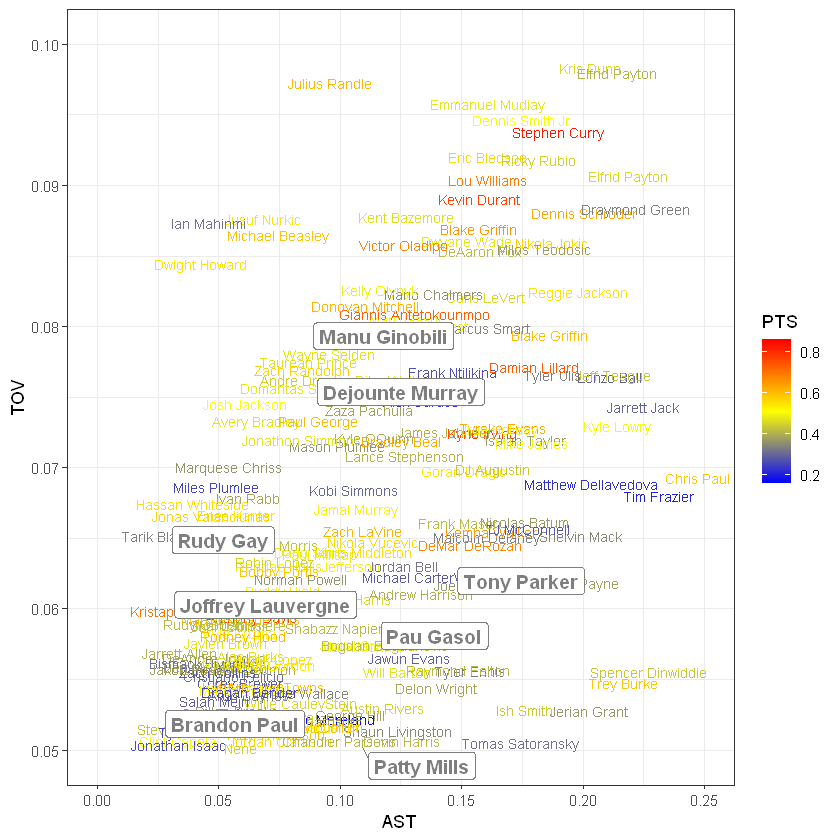

In [11]:
SAS <- which(Pbox.sel$Team=="San Antonio Spurs")
scatterplot(X, data.var=c("AST","TOV"), z.var="PTS",
            labels=Pbox.sel$Player, palette=mypal,
            subset=SAS, zoom=c(0,0.25,0.05,0.10))

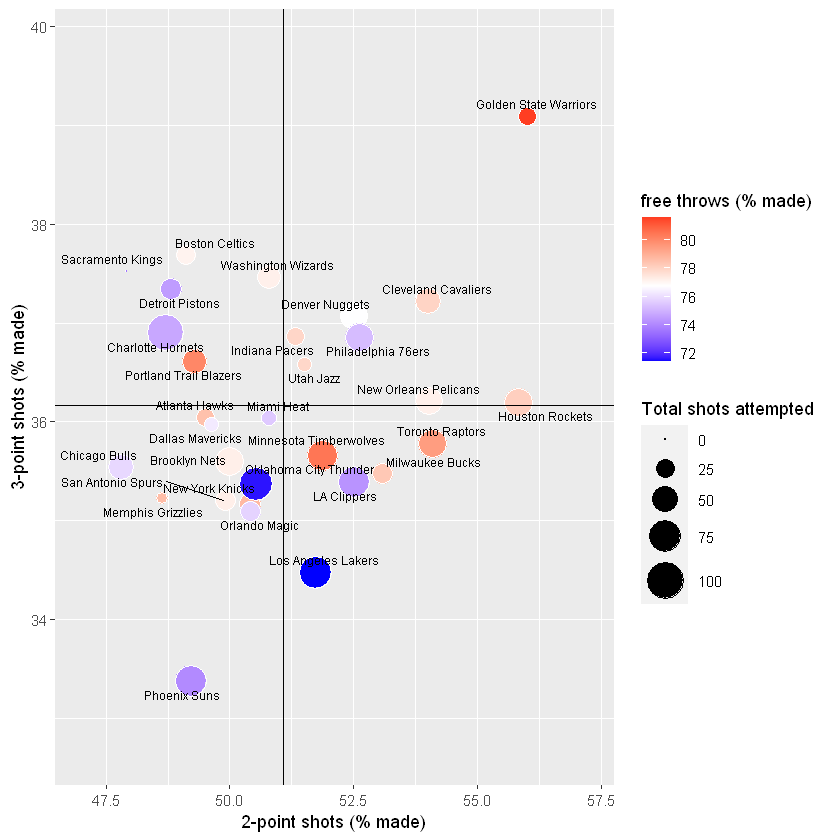

In [12]:
rm(list=ls())

attach(Tbox)
X <- data.frame(T=Team, P2p, P3p, FTp, AS=P2A+P3A+FTA)
detach(Tbox)
labs <- c("2-point shots (% made)",
          "3-point shots (% made)",
          "free throws (% made)",
          "Total shots attempted")
bubbleplot(X, id="T", x="P2p", y="P3p", col="FTp",
           size="AS", labels=labs)

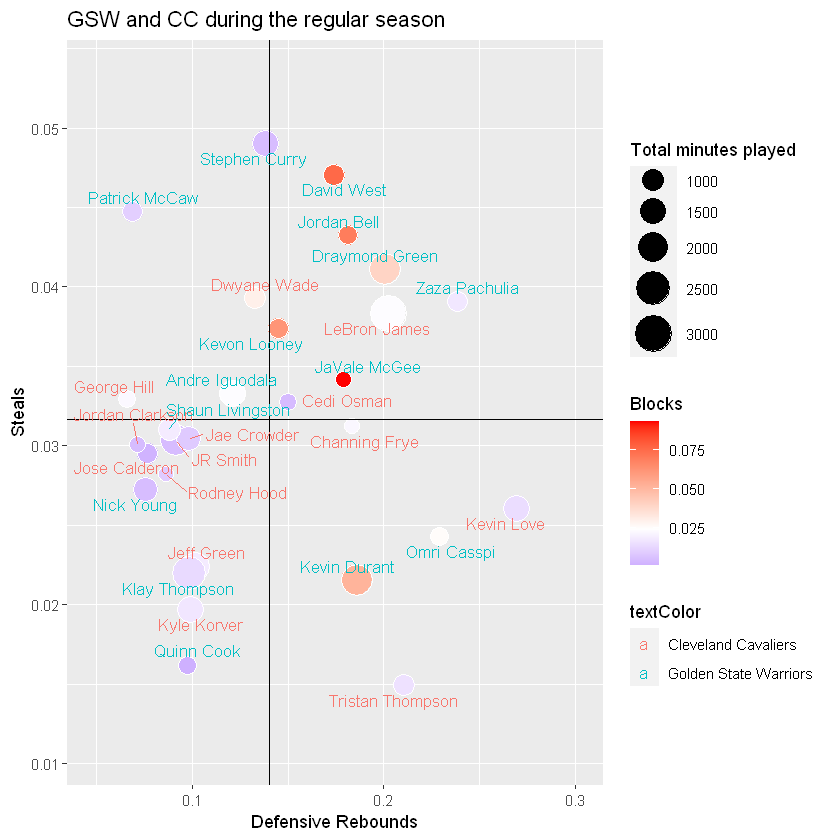

In [13]:
Pbox.GSW.CC <- subset(Pbox,
               (Team=="Golden State Warriors" |
                      Team =="Cleveland Cavaliers") &
                      MIN>=500)
attach(Pbox.GSW.CC)
X <- data.frame(ID=Player, Team, V1=DREB/MIN, V2=STL/MIN,
                V3=BLK/MIN, V4=MIN)
detach(Pbox.GSW.CC)
labs <- c("Defensive Rebounds","Steals","Blocks",
          "Total minutes played")
bubbleplot(X, id="ID", x="V1", y="V2", col="V3",
           size="V4", text.col="Team", labels=labs,
           title="GSW and CC during the regular season",
           text.legend=TRUE, text.size=3.5, scale=FALSE)

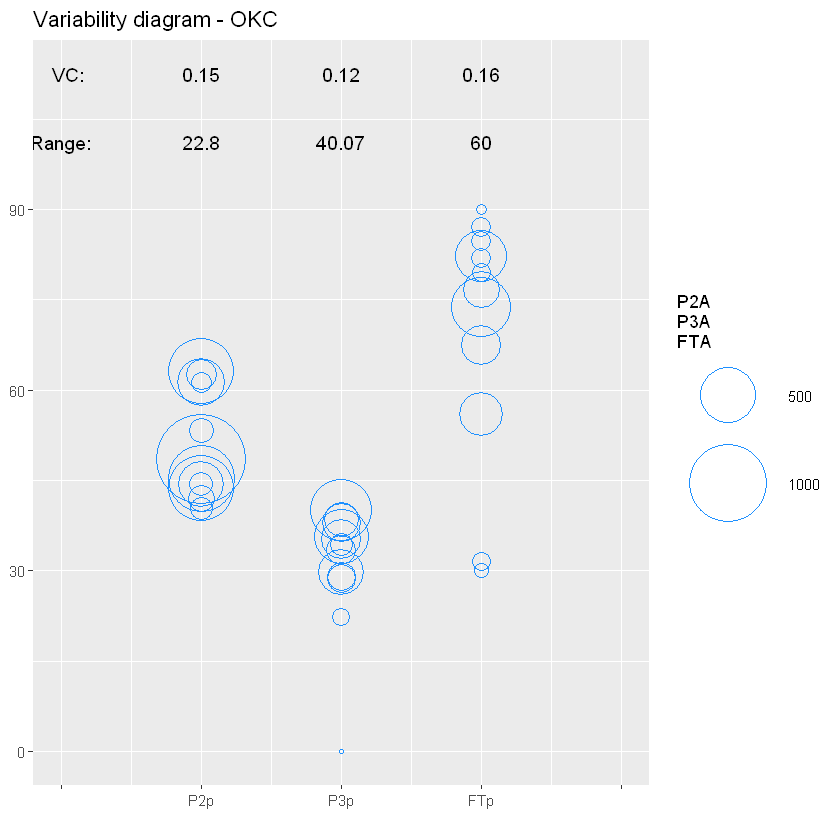

In [14]:
rm(list=ls())

Pbox.OKC <- subset(Pbox, Team=="Oklahoma City Thunder"
                   & MIN>=500)
vrb1 <- variability(data=Pbox.OKC, data.var="P3p",
                    size.var="P3A")

vrb1 <- variability(data=Pbox.OKC, data.var="P3p",
                    size.var="P3A",weight=TRUE)


vrb2 <- variability(data=Pbox.OKC,
                    data.var=c("P2p","P3p","FTp"),
                    size.var=c("P2A","P3A","FTA"),
                    weight=TRUE)

plot(vrb2, title="Variability diagram - OKC")

In [15]:
rm(list=ls())

Pbox.BN <- subset(Pbox, Team=="Brooklyn Nets")
ineqBN <- inequality(Pbox.BN$PTS, nplayers=8)
Pbox.MB <- subset(Pbox, Team=="Milwaukee Bucks")
ineqMB <- inequality(Pbox.MB$PTS, nplayers=8)

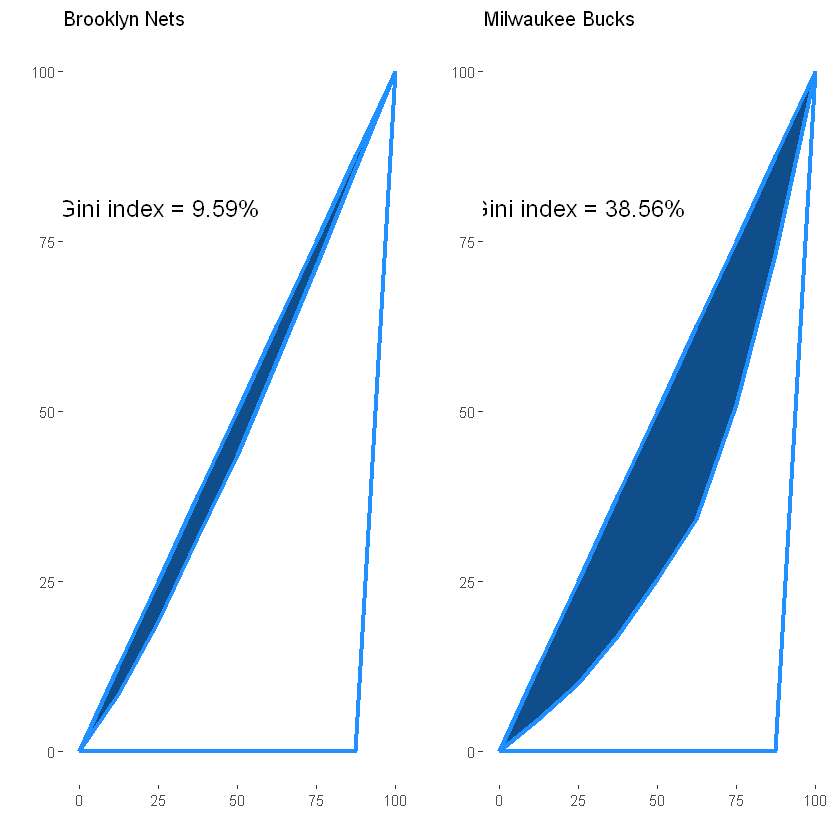

In [16]:
library(gridExtra)
p1 <- plot(ineqBN, title="Brooklyn Nets")
p2 <- plot(ineqMB, title="Milwaukee Bucks")
grid.arrange(p1, p2, nrow=1)

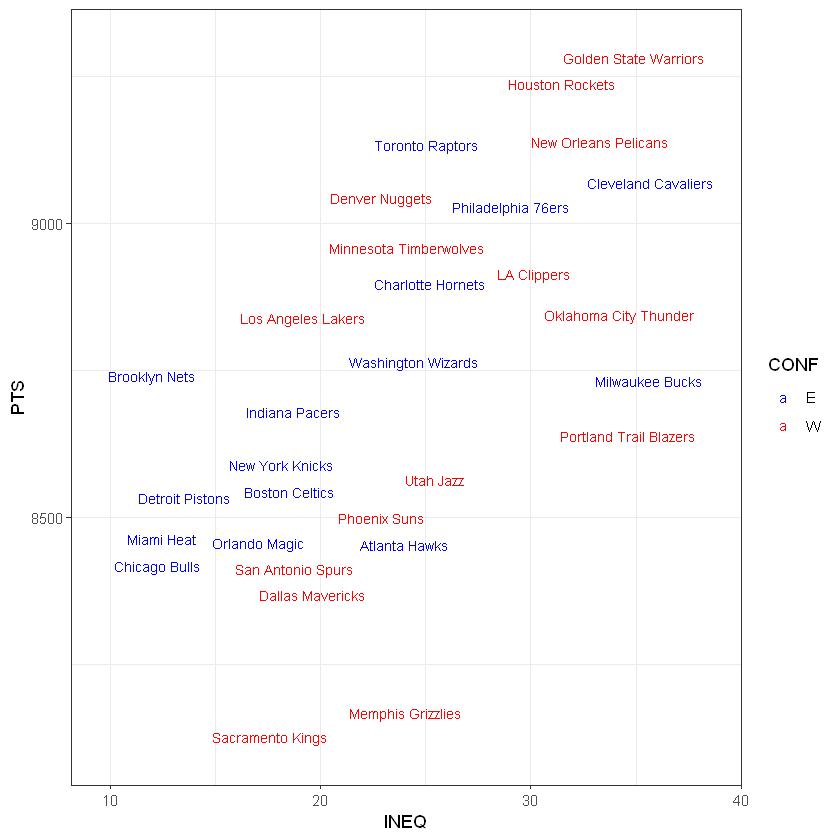

In [17]:
no.teams <- nrow(Tbox)
INEQ <- array(0, no.teams)
for (k in 1:no.teams) {
     Teamk <- Tbox$Team[k]
     Pbox.sel <- subset(Pbox, Team==Teamk)
     index <- inequality(Pbox.sel$PTS, npl=8)
     INEQ[k] <- index$Gini
     }

dts <- data.frame(INEQ, PTS=Tbox$PTS,
                  CONF=Tadd$Conference)
mypal <- colorRampPalette(c("blue","red"))
scatterplot(dts, data.var=c("INEQ","PTS"), z.var="CONF",
            labels=Tbox$Team, palette=mypal,
            repel_labels=TRUE)

In [18]:
rm(list=ls())
PbP <- PbPmanipulation(PbP.BDB)

PbP.GSW <- subset(PbP, team="GSW")

lineup <- c("Stephen Curry", "Kevin Durant",
             "Klay Thompson", "Draymond Green",
             "Zaza Pachulia")
filt5 <- apply(PbP.GSW[, 4:13], 1,
               function(x) {
               x <- as.character(x)
               sum(x %in% lineup)==5
               })


subPbP.GSW <- PbP.GSW[filt5, ]
PTS5 <- sapply(lineup,
               function(x) {
               filt <- subPbP.GSW$player==x
               sum(subPbP.GSW$points[filt], na.rm=T)
               })

inequality(PTS5,nplayer=5)

,F,Q
,<dbl>,<dbl>
,0.0,0.0000000
Draymond Green,0.2,0.1195029
Zaza Pachulia,0.4,0.2820268
Stephen Curry,0.6,0.5086042
Kevin Durant,0.8,0.7504780
Klay Thompson,1.0,1.0000000


In [19]:
rm(list=ls())
PbP <- PbPmanipulation(PbP.BDB)

PbP.GSW.DET <- subset(PbP, team=="GSW" & oppTeam=="DET")

lineup <- c("Stephen Curry", "Kevin Durant",
             "Klay Thompson", "Draymond Green",
             "Zaza Pachulia")
filt5 <- apply(PbP.GSW.DET[, 4:13], 1,
               function(x) {
               x <- as.character(x)
               sum(x %in% lineup)==5
               })


subPbP.GSW.DET <- PbP.GSW.DET[filt5, ]
PTS5 <- sapply(lineup,
               function(x) {
               filt <- subPbP.GSW.DET$player==x
               sum(subPbP.GSW.DET$points[filt], na.rm=T)
               })

inequality(PTS5,nplayer=5)

,F,Q
,<dbl>,<dbl>
,0.0,0.00000
Zaza Pachulia,0.2,0.06250
Draymond Green,0.4,0.12500
Kevin Durant,0.6,0.31250
Stephen Curry,0.8,0.53125
Klay Thompson,1.0,1.00000


In [20]:
rm(list=ls())
PbP <- PbPmanipulation(PbP.BDB)

subdata <- subset(PbP, player=="Kevin Durant")
subdata$xx <- subdata$original_x/10
subdata$yy <- subdata$original_y/10-41.75

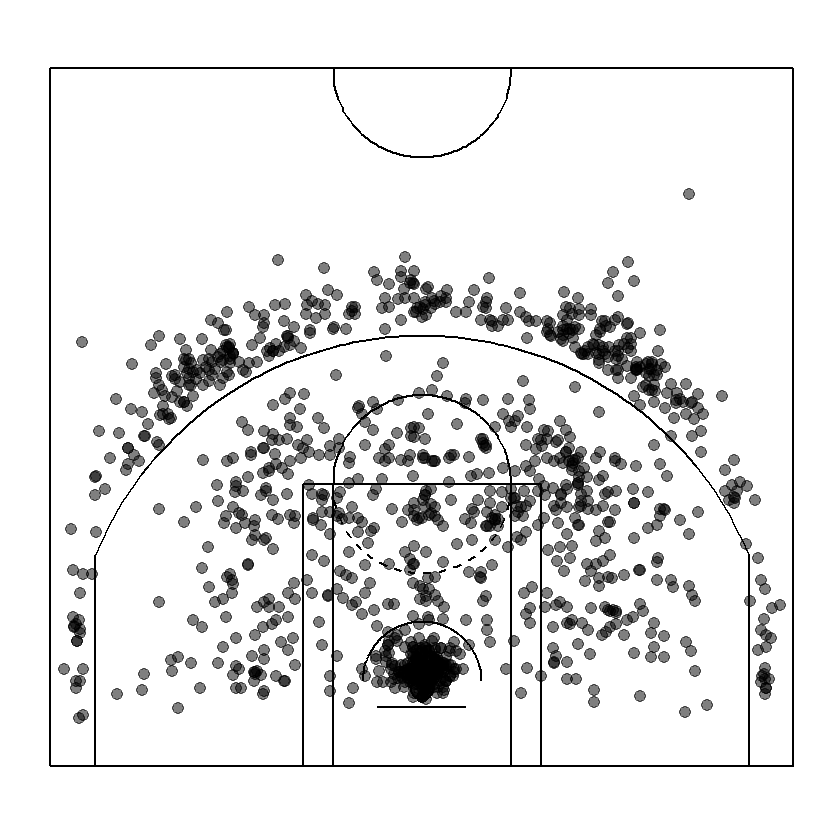

In [21]:
shotchart(data=subdata, x="xx", y="yy", type=NULL,
          scatter=TRUE)

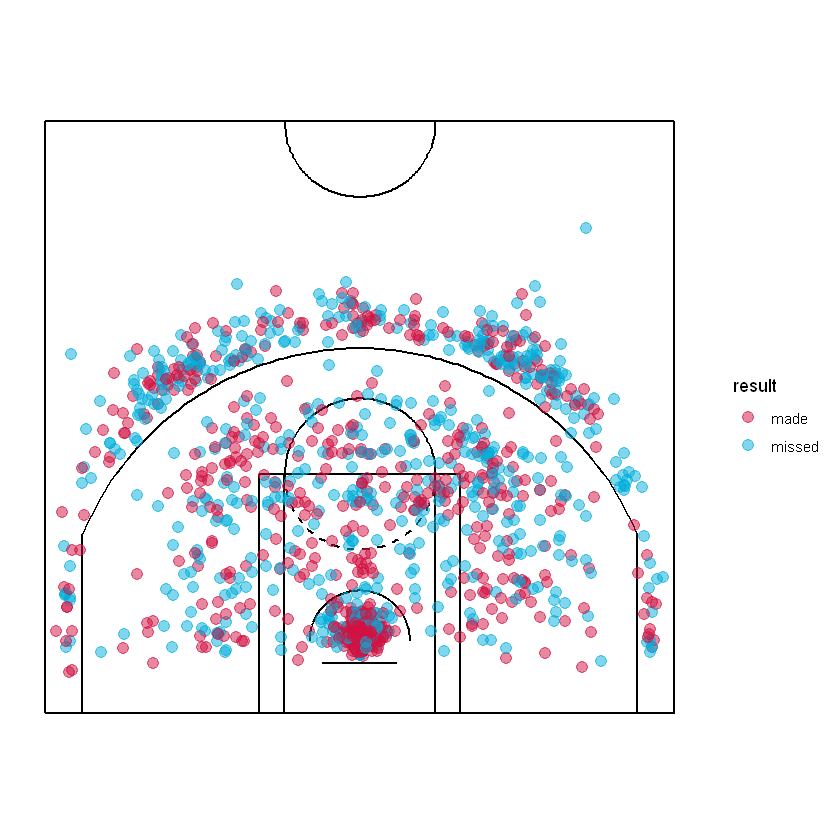

In [22]:
shotchart(data=subdata, x="xx", y="yy", z="result", type=NULL,
          scatter=TRUE)

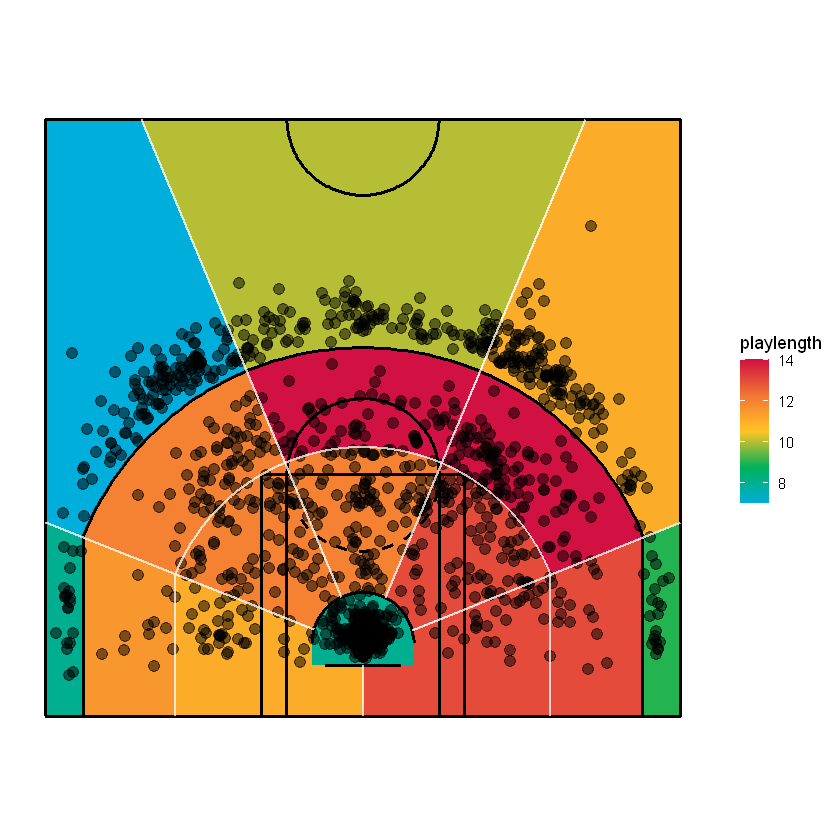

In [23]:
shotchart(data=subdata, x="xx", y="yy", z="playlength", 
          num.sect=5, type="sectors", scatter = TRUE)

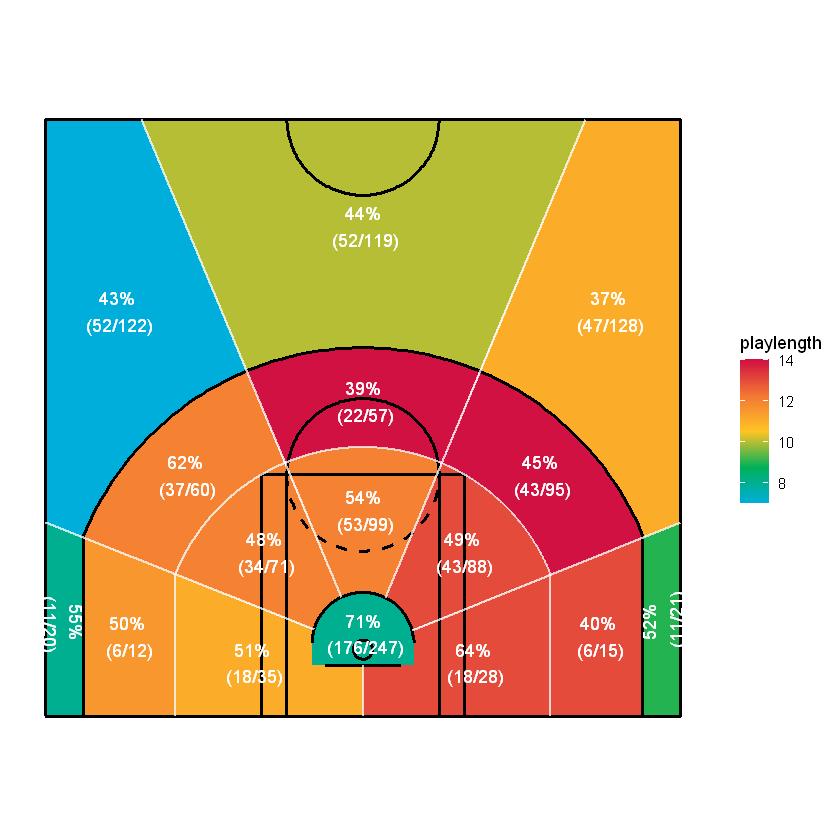

In [24]:
shotchart(data=subdata, x="xx", y="yy", z="playlength", 
          num.sect=5, type="sectors", scatter=FALSE, result="result")